# Plotting in Pandas

Sometimes there's no substitute for a good plot

In [4]:
%matplotlib inline

import numpy as np
import pandas as pd
from sklearn import datasets

## Scatter plots

In [5]:
d = datasets.load_iris()
iris = pd.DataFrame(d.data, columns=d.feature_names)
iris['Species'] = d.target
iris.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Species  
0        0  
1        0  
2        0  
3        0  
4        0

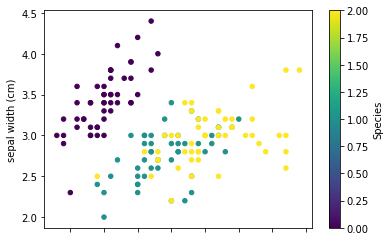

In [6]:
iris.plot.scatter('sepal length (cm)', 'sepal width (cm)', c='Species', cmap='viridis');

The colorbar is ugly. Maybe we can fix this by doing multiple plots...

In [ ]:
for Species, data in iris.groupby('Species'):
    data.plot.scatter('sepal length (cm)', 'sepal width (cm)', label=f'Species {Species}')

To plot all these on the *same* axis, we need to create an axis object and pass it to the plot function:

In [ ]:
target_names = d.target_names
target_names

In [ ]:
import matplotlib.pyplot as plt

ax = plt.axes()
colors = 'rgb'

for Species, data in iris.groupby('Species'):
    data.plot.scatter(
        'sepal length (cm)', 'sepal width (cm)', 
        s=data['petal length (cm)'] * 20,
        label=target_names[Species],
        c=colors[Species], 
        ax=ax,
        alpha=0.5,
    )

# Box plots

To get a feel for the distribution of a set of features, we can do box plots.

These show median, Q1, Q3, and (Q1 - 1.5 * IQR, Q3 + 1.5 * IQR)

In [ ]:
iris[iris.columns[:4]].plot.box();

## Line plots

Line plots are nice for showing time series data

In [ ]:
sales = pd.read_csv('./data/kaggle-sales/sales_train.csv.gz', parse_dates=['date'])
sales.head()

In [ ]:
sales['revenue'] = sales.item_cnt_day * sales.item_price
daily_sales = sales.groupby('date').revenue.sum()
daily_sales.head()

In [ ]:
daily_sales.plot();

In [ ]:
daily_sales.groupby(daily_sales.index.weekday).sum().plot.bar();

In [ ]:
daily_sales.resample('1Q').mean().plot();

In [ ]:
stocks = pd.read_csv('./data/closing-prices.csv', parse_dates=[0], index_col=0)
stocks.head()


In [ ]:
stocks.plot();

In [ ]:
stocks.plot(logy=True);

## Histograms 

We can use a histogram to count how many days fell into a particular range:

In [ ]:
daily_sales.head()

In [ ]:
daily_sales.plot.hist();

In [ ]:
item_price = sales.groupby('item_id').item_price.mean()
item_price.head()

In [ ]:
item_price.hist();

In [ ]:
item_price[item_price < 10_000].plot.hist(density=True)

## Using Seaborn to get nicer statistical plots

Seaborn provides two functions in particular that I like to use:

- distplot is a "nicer histogram"
- jointplot lets us look at how two features vary together

In [ ]:
import seaborn as sns

sns.distplot(item_price[item_price < 10000]);

In [ ]:
sns.jointplot('item_price', 'item_cnt_day', sales, alpha=0.01);

In [ ]:
sns.jointplot('item_price', 'item_cnt_day', sales, kind='hex');

In [ ]:
small_sales = sales[
    (sales.item_price < 10000) 
    & (sales.item_cnt_day < 10)
]

sns.jointplot('item_price', 'item_cnt_day', small_sales, kind='hex');

In [ ]:
crime = pd.read_csv('./data/sf_crime_truncated.csv', parse_dates=['Dates'])
crime.plot.scatter('X', 'Y', alpha=0.1);

In [ ]:
crime = crime[crime.Y < 90]
crime.plot.scatter('X', 'Y', alpha=0.1);

In [ ]:
sns.jointplot('X', 'Y', crime, alpha=0.1);

In [ ]:
sns.jointplot('X', 'Y', crime, kind='kde');

## Scatterplot matrices

Sometimes we'd like to look at a number of different variables and see how they vary together

In [ ]:
pd.plotting.scatter_matrix(
    iris[iris.columns[:-1]], 
    figsize=(12,12), 
    diagonal='kde', 
    c=iris.Species
);

We can also do correlation heatmaps:

In [ ]:
d = datasets.fetch_california_housing()
housing = pd.DataFrame(d.data, columns=d.feature_names)
housing['MedVal'] = d.target

In [ ]:
housing.corr()

In [ ]:
sns.heatmap(housing.corr(), cmap='coolwarm')

In [ ]:
sns.jointplot('MedInc', 'MedVal', housing, kind='kde');

Open the [Pandas plotting lab][pandas-plotting-lab]

[pandas-plotting-lab]: ./pandas-plotting-lab.ipynb

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
item_price.hist(ax=ax);

In [ ]:
fig.savefig('mychart.png')

<img src="mychart.png">

Also see https://altair-viz.github.io